<h1 style="color:#ff603b; font-family:Ewert; font-size:300%;" class="font-effect-3d">Code Library, Style and Links</h1>

[Google Colaboratory Version](https://colab.research.google.com/drive/16Xh8T4fPuk0AIBjnCo7e9WTrF1PgukoF)

In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ewert|Roboto&effect=3d|brick-sign|');
span {font-family:'Roboto'; color:black; text-shadow: 5px 5px 5px #aaa;}  
div.output_area pre{font-family:'Roboto'; font-size:110%; color: #ff603b;}      
</style>

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import os, json, cv2, h5py

import scipy as sp
import keras as ks

import matplotlib.pylab as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

print(os.listdir("../input"))

Using TensorFlow backend.


['image-examples-for-mixed-styles', 'haarcascades', 'resnet50', 'yale-face-database', 'classification-of-handwritten-letters', 'keras-applications-weights', 'flower-color-images']


In [4]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

from keras.preprocessing import sequence as keras_sequence
from keras.preprocessing import image as keras_image
from keras.utils import to_categorical

from PIL import ImageFile
from tqdm import tqdm
from skimage import io

In [5]:
from keras.models import Model, Sequential,  load_model
from keras.layers import Dense, Activation, Input, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers import Conv1D, MaxPooling1D, LSTM
from keras.layers.embeddings import Embedding

In [6]:
def loss_plot(fit_history):
    plt.figure(figsize=(14, 3))
    plt.plot(fit_history.history['loss'], label = 'train')
    plt.plot(fit_history.history['val_loss'], label = 'test')
    plt.legend()
    plt.title('Loss Function');  
    
def mae_plot(fit_history):
    plt.figure(figsize=(14, 3))
    plt.plot(fit_history.history['mean_absolute_error'], label = 'train')
    plt.plot(fit_history.history['val_mean_absolute_error'], label = 'test')
    plt.legend()
    plt.title('Mean Absolute Error'); 

def acc_plot(fit_history):
    plt.figure(figsize=(14, 3))
    plt.plot(fit_history.history['acc'], label = 'train')
    plt.plot(fit_history.history['val_acc'], label = 'test')
    plt.legend()
    plt.title('Accuracy'); 

<h1 style="color:#ff603b; font-family:Ewert; font-size:300%;" class="font-effect-3d">Backend</h1>

In [7]:
ks.__version__

'2.2.4'

In [8]:
# variants: theano, tensorflow, cntk
ks.backend.backend()

'tensorflow'

In [9]:
ks.backend.image_dim_ordering()

'tf'

<h1 style="color:#ff603b; font-family:Ewert; font-size:300%;" class="font-effect-3d">Data</h1>
## internal datasets

In [10]:
# variants: cifar10, cifar100, imdb, reuters, mnist, fashion_mnist, boston_housing
# 32x32 color images; 50,000 - the train set; 10,000 - the test set; labeled over 10 categories
(x_train1, y_train1), (x_test1, y_test1) = ks.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 56s 0us/step


In [11]:
n = int(len(x_test1)/2)
x_valid1, y_valid1 = x_test1[:n], y_test1[:n]
x_test1, y_test1 = x_test1[n:], y_test1[n:]
print(x_train1.shape, x_valid1.shape, x_test1.shape)
print(y_train1.shape, y_valid1.shape, y_test1.shape)

(50000, 32, 32, 3) (5000, 32, 32, 3) (5000, 32, 32, 3)
(50000, 1) (5000, 1) (5000, 1)


Label:  9


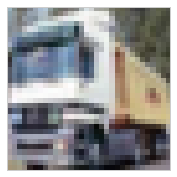

In [12]:
print('Label: ', y_train1[1][0])
plt.figure(figsize=(3,3)); plt.xticks([]); plt.yticks([])
plt.imshow(x_train1[1]);

In [13]:
# 28x28 grayscale images; 55,000 - the train set; 10,000 - the test set; labeled over 10 categories
(x_train2, y_train2), (x_test2, y_test2) = ks.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [14]:
n = int(len(x_test2)/2)
x_valid2, y_valid2 = x_test2[:n], y_test2[:n]
x_test2, y_test2 = x_test2[n:], y_test2[n:]
print(x_train2.shape, x_valid2.shape, x_test2.shape)
print(y_train2.shape, y_valid2.shape, y_test2.shape)

(60000, 28, 28) (5000, 28, 28) (5000, 28, 28)
(60000,) (5000,) (5000,)


Label:  0


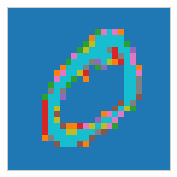

In [15]:
print('Label: ', y_train2[1])
plt.figure(figsize=(3,3)); plt.xticks([]); plt.yticks([])
plt.imshow(x_train2[1], cmap='tab10');

In [16]:
# 18000 newsgroups posts on 20 topics
train = fetch_20newsgroups(subset='train',shuffle=True,remove=('headers','footers','quotes'))
test = fetch_20newsgroups(subset='test',shuffle=True,remove=('headers','footers','quotes'))
y_train3, y_test3 = train.target, test.target
vectorizer = TfidfVectorizer(sublinear_tf=True,max_df=0.5,stop_words='english')
x_train3 = vectorizer.fit_transform(train.data) 
x_test3 = vectorizer.transform(test.data)
del train,test
x_test3, x_valid3, y_test3, y_valid3 = train_test_split(x_test3,y_test3,test_size=0.5,random_state=1)
x_train3.shape, x_valid3.shape, x_test3.shape

((11314, 101322), (3766, 101322), (3766, 101322))

In [17]:
print('Label: ', y_train3[1])
print('Sequence of word indexes: \n', x_train3[1])

Label:  4
Sequence of word indexes: 
   (0, 31927)	0.09047140546465948
  (0, 39296)	0.1270498791022587
  (0, 66680)	0.08760497367334341
  (0, 23973)	0.17002519748787917
  (0, 83779)	0.1611030246015933
  (0, 92389)	0.15596867101914402
  (0, 82337)	0.149185570783794
  (0, 27889)	0.21773415378419708
  (0, 68519)	0.17126924074876296
  (0, 81848)	0.1400199120757977
  (0, 38637)	0.2349094316272378
  (0, 72039)	0.28043456255303295
  (0, 81378)	0.09557715842759543
  (0, 24125)	0.14730622500536728
  (0, 60923)	0.1037907683672198
  (0, 33127)	0.18059866666366173
  (0, 73122)	0.14599105589051786
  (0, 84088)	0.175848477889496
  (0, 20236)	0.18992809257856047
  (0, 30233)	0.13398312143926927
  (0, 75904)	0.15407643854453287
  (0, 16791)	0.1823775875595039
  (0, 25769)	0.11704456707539097
  (0, 16776)	0.16772235763004084
  (0, 45997)	0.13555253839447046
  (0, 82666)	0.18721799969210928
  (0, 47310)	0.13555253839447046
  (0, 92588)	0.14642114683210833
  (0, 40727)	0.1263135220082144
  (0, 34011)	0.1

In [18]:
# 13 attributes of houses at different locations, targets are the median values of the houses at a location (in k$)
(x_train4, y_train4), (x_test4, y_test4) =  ks.datasets.boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [19]:
n = int(len(x_test4)/2)
x_valid4, y_valid4 = x_test4[:n], y_test4[:n]
x_test4, y_test4 = x_test4[n:], y_test4[n:]
print(x_train4.shape, x_valid4.shape, x_test4.shape)
print(y_train4.shape, y_valid4.shape, y_test4.shape)

(404, 13) (51, 13) (51, 13)
(404,) (51,) (51,)


In [20]:
print('Target value: ', y_train4[1])
print("Features' values: \n", x_train4[1])

Target value:  42.3
Features' values: 
 [2.1770e-02 8.2500e+01 2.0300e+00 0.0000e+00 4.1500e-01 7.6100e+00
 1.5700e+01 6.2700e+00 2.0000e+00 3.4800e+02 1.4700e+01 3.9538e+02
 3.1100e+00]


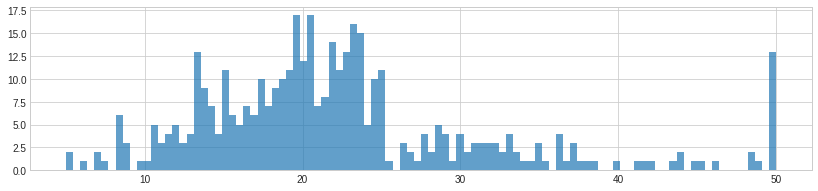

In [21]:
plt.figure(figsize=(14, 3))
plt.hist(y_train4, bins=100, alpha=0.7);

## artificial datasets

In [22]:
# the artificial sets for classification, labeled over 2 categories 
X5, Y5 = make_classification(n_samples=5000, n_features=2, n_redundant=0, n_informative=2)
x_train5, x_test5, y_train5, y_test5 = train_test_split(X5, Y5, test_size = 0.2, random_state = 1)

In [23]:
n = int(len(x_test5)/2)
x_valid5, y_valid5 = x_test5[:n], y_test5[:n]
x_test5, y_test5 = x_test5[n:], y_test5[n:]
print(x_train5.shape, x_valid5.shape, x_test5.shape)
print(y_train5.shape, y_valid5.shape, y_test5.shape)

(4000, 2) (500, 2) (500, 2)
(4000,) (500,) (500,)


In [24]:
print('Label: ', y_train5[1])
print('Features: \n', x_train5[1])

Label:  0
Features: 
 [-0.68760779 -0.88166915]


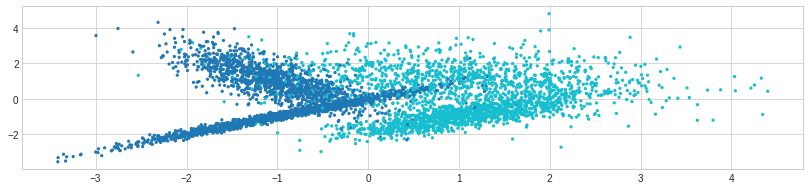

In [25]:
plt.figure(figsize=(14,3)); plt.scatter(X5[:, 0], X5[:, 1], marker='o', s=5, c=Y5, cmap='tab10');

## external datasets

In [26]:
# 150x150 grayscale face images; labeled over 15 categories(persons)
yalefaces_paths = []
yalefaces_images = []
yalefaces_labels = []

for element in os.listdir("../input/yale-face-database/data/"):
    if element != 'Readme.txt':
        yalefaces_paths.append(os.path.join("../input/yale-face-database/data/", element))
    
for path in yalefaces_paths:
    image = io.imread(path, as_gray=True)
    yalefaces_images.append(image)
    
    label = int(os.path.split(path)[1].split(".")[0].replace("subject", "")) - 1
    yalefaces_labels.append(label) 
    
yalefaces_cut_images = []
face_detector = cv2.CascadeClassifier("../input/haarcascades/haarcascade_frontalface_default.xml")
for i in range(len(yalefaces_images)):
    image = yalefaces_images[i]
    face = face_detector.detectMultiScale(image)
    x, y = face[0][:2]
    cut_image = image[y: y+150, x: x+150]
    yalefaces_cut_images.append(cut_image)    
    
yalefaces_labels = np.array(yalefaces_labels)
yalefaces_cut_images = np.array(yalefaces_cut_images)/255

In [27]:
x_train6, x_test6, y_train6, y_test6 = \
train_test_split(yalefaces_cut_images, yalefaces_labels, test_size = 0.2, random_state = 1)

In [28]:
n = int(len(x_test6)/2)
x_valid6, y_valid6 = x_test6[:n], y_test6[:n]
x_test6, y_test6 = x_test6[n:], y_test6[n:]
print(x_train6.shape, x_valid6.shape, x_test6.shape)
print(y_train6.shape, y_valid6.shape, y_test6.shape)

(132, 150, 150) (16, 150, 150) (17, 150, 150)
(132,) (16,) (17,)


Label:  7


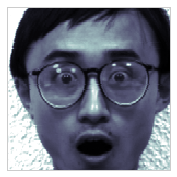

In [29]:
print('Label: ', y_train6[1])
plt.figure(figsize=(3,3)); plt.xticks([]); plt.yticks([])
plt.imshow(x_train6[1], cmap='bone');

In [30]:
# 128x128 flower color images; 189 - the train set; 21 - the test set; labeled over 10 categories
flowers = pd.read_csv("../input/flower-color-images/flower_images/flower_images/flower_labels.csv")
flower_files = flowers['file']
flower_targets = flowers['label'].values

In [31]:
def path_to_tensor(img_path):
    img = keras_image.load_img("../input/flower-color-images/flower_images/flower_images/"+img_path, target_size=(128, 128))
    x = keras_image.img_to_array(img)
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

ImageFile.LOAD_TRUNCATED_IMAGES = True                 

flower_tensors = paths_to_tensor(flower_files)/255;

100%|██████████| 210/210 [00:00<00:00, 244.72it/s]


In [32]:
x_train7, x_test7, y_train7, y_test7 = \
train_test_split(flower_tensors, flower_targets,  test_size = 0.1, random_state = 1)

In [33]:
n = int(len(x_test7)/2)
x_valid7, y_valid7 = x_test7[:n], y_test7[:n]
x_test7, y_test7 = x_test7[n:], y_test7[n:]
print(x_train7.shape, x_valid7.shape, x_test7.shape)
print(y_train7.shape, y_valid7.shape, y_test7.shape)

(189, 128, 128, 3) (10, 128, 128, 3) (11, 128, 128, 3)
(189,) (10,) (11,)


Label:  3


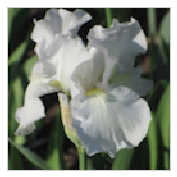

In [34]:
print('Label: ', y_train7[1])
plt.figure(figsize=(3,3)); plt.xticks([]); plt.yticks([])
plt.imshow(x_train7[1]);

(11352, 32, 32, 3) (1419, 32, 32, 3) (1419, 32, 32, 3)
ё


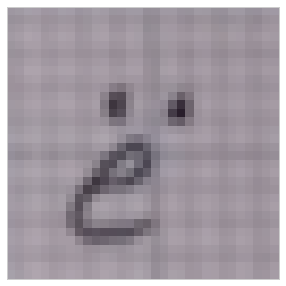

In [35]:
f = h5py.File('../input/classification-of-handwritten-letters/LetterColorImages_123.h5','r') 
keys = list(f.keys()); letters = u'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
letter_images = np.array(f[keys[1]])/255; targets = np.array(f[keys[2]])
x_train8,x_test8,y_train8,y_test8 = train_test_split(letter_images,targets,test_size=0.2,random_state=1)
del letter_images,targets
x_test8,x_valid8,y_test8,y_valid8 = train_test_split(x_test8,y_test8,test_size=0.5,random_state=1)
print(x_train8.shape, x_valid8.shape, x_test8.shape)
print(letters[y_train8[2000]-1]) 
plt.figure(figsize=(5,5)); plt.xticks([]); plt.yticks([]); 
plt.imshow(x_train8[2000]); plt.show()

<h1 style="color:#ff603b; font-family:Ewert; font-size:300%;" class="font-effect-3d">Preprocessing</h1>

In [36]:
# One-Hot Encoding
c_y_train1 = to_categorical(y_train1, 10) 
c_y_valid1 = to_categorical(y_valid1, 10)
c_y_test1 = to_categorical(y_test1, 10)
c_y_train2 = to_categorical(y_train2, 10)
c_y_valid2 = to_categorical(y_valid2, 10)
c_y_test2 = to_categorical(y_test2, 10)
c_y_train3 = to_categorical(y_train3,20)
c_y_valid3 = to_categorical(y_valid3,20)
c_y_test3 = to_categorical(y_test3,20)
c_y_train6 = to_categorical(y_train6, 15)
c_y_valid6 = to_categorical(y_valid6, 15)
c_y_test6 = to_categorical(y_test6, 15)
c_y_train7 = to_categorical(y_train7, 10)
c_y_valid7 = to_categorical(y_valid7, 10)
c_y_test7 = to_categorical(y_test7, 10)
c_y_train8 = to_categorical(y_train8-1, 33)
c_y_valid8 = to_categorical(y_valid8-1, 33)
c_y_test8 = to_categorical(y_test8-1, 33)

<h1 style="color:#ff603b; font-family:Ewert; font-size:300%;" class="font-effect-3d">Basic Examples</h1>

In [37]:
# The basic model for binary classification
basic_model = Sequential([Dense(16, input_dim=2),  Activation('relu'), Dense(1),  Activation('sigmoid')])
basic_model.compile(optimizer='adam',  loss='binary_crossentropy',  metrics=['accuracy'])
# Train 
basic_model.fit(x_train5, y_train5, 
                validation_data=(x_valid5, y_valid5), 
                epochs=100, batch_size=128, verbose=0)
# Predict classes
y_test5_predictions = basic_model.predict_classes(x_test5)

# Evaluate
basic_model.evaluate(x_test5, y_test5)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
500/500 [==============================] - 0s 33us/step


[0.13893202900886537, 0.9439999990463257]

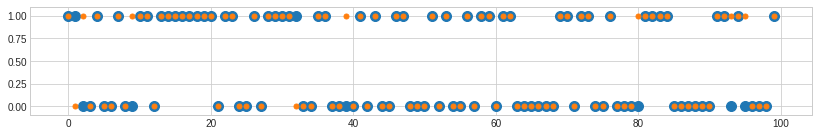

In [38]:
plt.figure(figsize=(14,2))
plt.scatter(range(100), y_test5[:100], s=100)
plt.scatter(range(100), y_test5_predictions[:100], s=25);

In [39]:
basic_model.input, basic_model.outputs

(<tf.Tensor 'dense_1_input:0' shape=(?, 2) dtype=float32>,
 [<tf.Tensor 'activation_2/Sigmoid:0' shape=(?, 1) dtype=float32>])

In [40]:
basic_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                48        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [41]:
basic_model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'batch_input_shape': (None, 2),
    'dtype': 'float32',
    'units': 16,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      'mode': 'fan_avg',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Activation',
   'config': {'name': 'activation_1',
    'trainable': True,
    'activation': 'relu'}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_2',
    'trainable': True,
    'units': 1,
    'activation': 'linear',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 1.0,
      '

In [42]:
basic_model.get_weights()

[array([[ 0.09989449, -0.82467943,  1.0277566 , -0.7888009 , -0.76656765,
          1.2098496 , -0.55226815, -0.6074144 , -0.14967471,  0.1461102 ,
         -0.548346  , -0.32136297,  0.7436786 , -0.42324612, -0.46027076,
         -0.81827414],
        [ 1.0927132 , -0.10277816, -1.0315163 , -0.1168646 , -0.13352607,
         -1.185336  , -0.11352141, -0.09183057,  0.02921025,  1.0350581 ,
          0.12120517, -0.15471828, -1.0738972 , -0.07041113, -0.49178293,
         -0.07355712]], dtype=float32),
 array([ 0.19565827,  0.4040617 , -0.1219501 ,  0.45665202,  0.4399276 ,
        -0.1538968 ,  0.48604158,  0.52776074,  0.3123572 ,  0.21032017,
         0.59649366, -0.07357097, -0.09750091,  0.57874435, -0.27768686,
         0.42888752], dtype=float32),
 array([[ 0.77583766],
        [-0.46486712],
        [ 0.7957867 ],
        [-0.37218505],
        [-0.68321216],
        [ 0.8068503 ],
        [-0.7254241 ],
        [-0.4109486 ],
        [-0.5407317 ],
        [ 0.77974164],
      

In [43]:
# Save/reload models
# basic_model.save('basic_model.h5')
# basic_model = load_model('basic_model.h5')

In [44]:
# Save/reload weights
# basic_model.save_weights('basic_model_weights.h5')
# basic_model.load_weights('basic_model_weights.h5', by_name=False)

In [45]:
# Choose optimization
optimizer = ks.optimizers.Nadam(lr=0.005, beta_1=0.99, beta_2=0.9999, epsilon=None, schedule_decay=0.005)
basic_model = Sequential([Dense(16, input_dim=2),  Activation('relu'), Dense(1),  Activation('sigmoid')])
basic_model.compile(optimizer=optimizer,  loss='binary_crossentropy',  metrics=['accuracy'])
basic_model.fit(x_train5, y_train5, 
                validation_data=(x_valid5, y_valid5), 
                epochs=100, batch_size=128, verbose=0)
basic_model.evaluate(x_test5, y_test5)

500/500 [==============================] - 0s 33us/step


[0.1267687321305275, 0.95]

In [46]:
# Improve activation
inp = Input(shape=(2,))
act = ks.layers.LeakyReLU(alpha=0.4)
lay = act(Dense(16, name='encoder')(inp))

out = Dense(1, activation='sigmoid', name='decoder')(lay)

basic_model = Model(inputs=inp, outputs=out, name='cae')
basic_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

basic_model.fit(x_train5, y_train5, 
                validation_data=(x_valid5, y_valid5), 
                epochs=100, batch_size=128, verbose=0)

basic_model.evaluate(x_test5, y_test5)

500/500 [==============================] - 0s 33us/step


[0.12712451910972594, 0.952]

In [47]:
# Use callbacks
early_stopping = ks.callbacks.EarlyStopping(monitor='val_loss', patience=20)
checkpointer = ks.callbacks.ModelCheckpoint(filepath='weights.best.basic_model.hdf5', save_best_only=True)
lr_reduction = ks.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5)

basic_model = Model(inputs=inp, outputs=out, name='cae')
basic_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

basic_model.fit(x_train5, y_train5, validation_data=(x_valid5, y_valid5),
                epochs=200, batch_size=128, verbose=0, 
                callbacks=[early_stopping, checkpointer,  lr_reduction])

basic_model.load_weights('weights.best.basic_model.hdf5')
basic_model.evaluate(x_test5, y_test5)

500/500 [==============================] - 0s 36us/step


[0.12646156227588654, 0.958]

<h1 style="color:#ff603b; font-family:Ewert; font-size:300%;" class="font-effect-3d">Multi-Layer Perceptrons</h1>

In [48]:
# Reshape image arrays
x_train6 = (x_train6).reshape(-1, 150*150)
x_valid6 = (x_valid6).reshape(-1, 150*150)
x_test6 = (x_test6).reshape(-1, 150*150)

In [49]:
# Multi-Class Classification
def model():
    model = Sequential()    
    model.add(Dense(128, activation='relu', input_shape=(22500,)))
    model.add(Dropout(0.1))    
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.1))    
    model.add(Dense(15, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = model()
checkpointer = ks.callbacks.ModelCheckpoint(filepath='weights.best.model.hdf5', save_best_only=True)
lr_reduction = ks.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=2, factor=0.5)

history = model.fit(x_train6, c_y_train6, validation_data=(x_valid6, c_y_valid6),
                    epochs=70, batch_size=64, verbose=0,
                    callbacks=[checkpointer,  lr_reduction])

model.load_weights('weights.best.model.hdf5')
model.evaluate(x_test6, c_y_test6)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Epoch 00028: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00033: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 00049: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 00054: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 00059: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 00064: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 00069: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
17/17 [==============================] - 0s 183us/step


[0.5579724907875061, 0.8235294222831726]

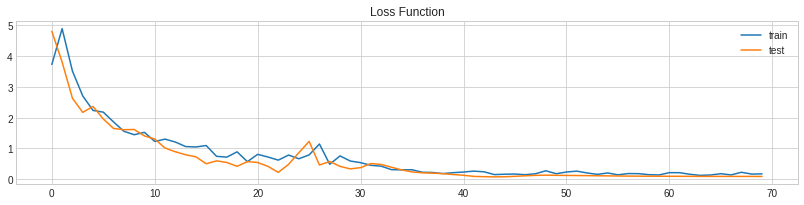

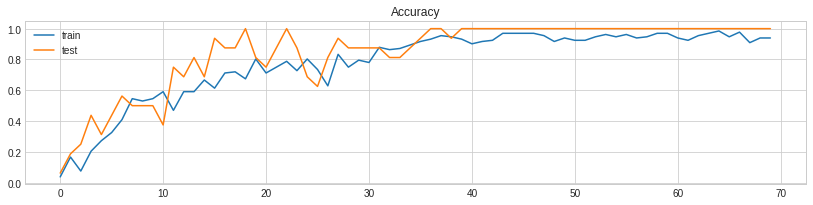

In [50]:
loss_plot(history)
acc_plot(history)

In [51]:
# Regression
def model():
    model = Sequential()    
    model.add(Dense(52, activation='relu', input_shape=(13,)))    
    model.add(Dense(52, activation='relu'))     
    model.add(Dense(208, activation='relu'))
    model.add(Dense(208, activation='relu'))    
    model.add(Dense(832, activation='relu'))    
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])     
    return model

model = model()
checkpointer = ks.callbacks.ModelCheckpoint(filepath='weights.best.model.hdf5', verbose=2, save_best_only=True)
lr_reduction = ks.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=2, factor=0.5)

history = model.fit(x_train4, y_train4, validation_data=(x_valid4, y_valid4),
                    epochs=100, batch_size=16, verbose=0,
                    callbacks=[checkpointer,  lr_reduction])

model.load_weights('weights.best.model.hdf5')
model.evaluate(x_test4, y_test4)


Epoch 00001: val_loss improved from inf to 49.90944, saving model to weights.best.model.hdf5

Epoch 00002: val_loss did not improve from 49.90944

Epoch 00003: val_loss did not improve from 49.90944

Epoch 00004: val_loss did not improve from 49.90944

Epoch 00005: val_loss did not improve from 49.90944

Epoch 00006: val_loss did not improve from 49.90944

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00007: val_loss did not improve from 49.90944

Epoch 00008: val_loss improved from 49.90944 to 46.57150, saving model to weights.best.model.hdf5

Epoch 00009: val_loss did not improve from 46.57150

Epoch 00010: val_loss improved from 46.57150 to 46.34497, saving model to weights.best.model.hdf5

Epoch 00011: val_loss improved from 46.34497 to 45.95492, saving model to weights.best.model.hdf5

Epoch 00012: val_loss did not improve from 45.95492

Epoch 00013: val_loss did not improve from 45.95492

Epoch 00014: val_loss improved from 45.95492 to 41

[43.08358861885819, 4.719811289918189]

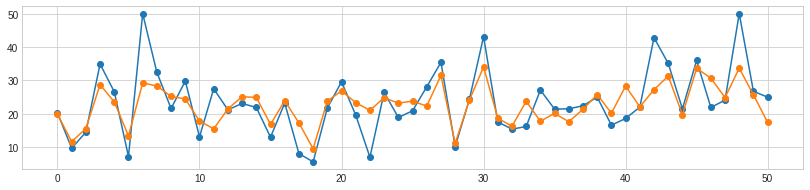

In [52]:
y_test4_predictions = model.predict(x_test4)
plt.figure(figsize=(14,3))
plt.plot(range(len(y_test4)), y_test4, '-o', label = 'real data')
plt.plot(range(len(y_test4)), y_test4_predictions, '-o', label = 'predictions');

In [53]:
# Text Classification
def model():
    model = Sequential()    
    model.add(Dense(128, activation='relu', input_shape=(101322,)))
    model.add(Dropout(rate=0.1))    
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(rate=0.1))    
    model.add(Dense(20, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = model()
early_stopping = ks.callbacks.EarlyStopping(monitor='val_loss', patience=20)
checkpointer = ks.callbacks.ModelCheckpoint(filepath='weights.best.model.hdf5', save_best_only=True)
lr_reduction = ks.callbacks.ReduceLROnPlateau(monitor='val_loss', verbose=2, patience=5, factor=0.8)

history = model.fit(x_train3, c_y_train3, validation_data=(x_valid3, c_y_valid3),
                    epochs=30, batch_size=128, verbose=0,
                    callbacks=[early_stopping,checkpointer,lr_reduction])


Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.

Epoch 00012: ReduceLROnPlateau reducing learning rate to 0.0006400000303983689.

Epoch 00017: ReduceLROnPlateau reducing learning rate to 0.0005120000336319208.

Epoch 00022: ReduceLROnPlateau reducing learning rate to 0.00040960004553198815.


3766/3766 [==============================] - 2s 419us/step


[1.0215908267430909, 0.6994158259364942]

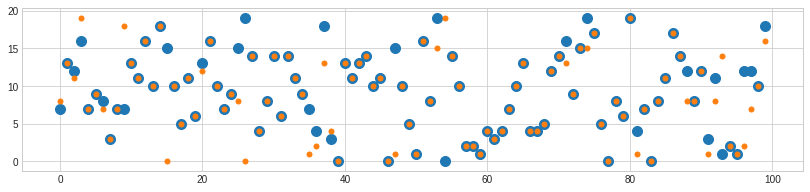

In [54]:
model.load_weights('weights.best.model.hdf5')
y_test3_predictions = model.predict_classes(x_test3)
plt.figure(figsize=(14,3))
plt.scatter(range(100), y_test3[:100], s=100)
plt.scatter(range(100), y_test3_predictions[:100], s=25)
model.evaluate(x_test3, c_y_test3)

<h1 style="color:#ff603b; font-family:Ewert; font-size:300%;" class="font-effect-3d">Convolutional Neural Networks</h1>

In [55]:
# VGG-like CNN: Multi-Class Classification
def model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), padding='same', input_shape=x_train8.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (5, 5)))
    model.add(Activation('relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(96, (5, 5), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (5, 5)))
    model.add(Activation('relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(GlobalMaxPooling2D())    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))    
    model.add(Dense(33))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])    
    return model

In [56]:
model = model()
checkpointer = ks.callbacks.ModelCheckpoint(filepath='weights.best.model.hdf5',  save_best_only=True)
lr_reduction = ks.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=0, factor=0.5)

history = model.fit(x_train8, c_y_train8, validation_data=(x_valid8, c_y_valid8),
                    epochs=50, batch_size=256, verbose=0,
                    callbacks=[checkpointer,  lr_reduction])

model.load_weights('weights.best.model.hdf5')
model.evaluate(x_test8, c_y_test8)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
1419/1419 [==============================] - 0s 71us/step


[1.0580693959265717, 0.7117688515137585]

In [57]:
steps, epochs = 1000, 5
data_generator = keras_image.ImageDataGenerator(zoom_range=0.2, rotation_range=20)
dg_history = \
model.fit_generator(data_generator.flow(x_train8, c_y_train8, batch_size=256),
                    steps_per_epoch = steps, epochs = epochs, verbose=2, 
                    validation_data = (x_valid8, c_y_valid8),
                    callbacks=[checkpointer,  lr_reduction])

model.load_weights('weights.best.model.hdf5')
model.evaluate(x_test8, c_y_test8)

Epoch 1/5
 - 87s - loss: 1.4665 - acc: 0.5650 - val_loss: 0.8725 - val_acc: 0.7597
Epoch 2/5
 - 85s - loss: 1.1704 - acc: 0.6496 - val_loss: 0.7936 - val_acc: 0.7717
Epoch 3/5
 - 85s - loss: 0.9987 - acc: 0.6987 - val_loss: 0.6084 - val_acc: 0.8266
Epoch 4/5
 - 88s - loss: 0.8816 - acc: 0.7328 - val_loss: 0.5746 - val_acc: 0.8379
Epoch 5/5
 - 86s - loss: 0.7938 - acc: 0.7586 - val_loss: 0.5238 - val_acc: 0.8499
1419/1419 [==============================] - 0s 83us/step


[0.5237010609649957, 0.8435517969981644]

In [58]:
# CNN: Regression
def model():
    model = Sequential()    
    model.add(Conv1D(52, 5, padding='valid', activation='relu', input_shape=(13,1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))
    model.add(Conv1D(208, 3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.2))    
    model.add(Flatten())
    model.add(Dense(1024, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(1, kernel_initializer='normal'))    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    return model    

In [59]:
model = model()
checkpointer = ks.callbacks.ModelCheckpoint(filepath='weights.best.model.hdf5', verbose=0, save_best_only=True)
lr_reduction = ks.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=10, verbose=2, factor=0.95)

history = model.fit(x_train4.reshape(-1, 13, 1),  y_train4, 
                    validation_data=(x_valid4.reshape(-1, 13, 1),  y_valid4),
                    epochs=300, batch_size=16, verbose=0,
                    callbacks=[checkpointer,  lr_reduction])

model.load_weights('weights.best.model.hdf5')
model.evaluate(x_test4.reshape(-1, 13, 1),  y_test4)


Epoch 00015: ReduceLROnPlateau reducing learning rate to 0.0009500000451225787.

Epoch 00025: ReduceLROnPlateau reducing learning rate to 0.0009025000152178108.

Epoch 00035: ReduceLROnPlateau reducing learning rate to 0.0008573750033974647.

Epoch 00059: ReduceLROnPlateau reducing learning rate to 0.0008145062311086804.

Epoch 00089: ReduceLROnPlateau reducing learning rate to 0.0007737808919046074.

Epoch 00099: ReduceLROnPlateau reducing learning rate to 0.000735091819660738.

Epoch 00109: ReduceLROnPlateau reducing learning rate to 0.0006983372120885178.

Epoch 00120: ReduceLROnPlateau reducing learning rate to 0.0006634203542489559.

Epoch 00130: ReduceLROnPlateau reducing learning rate to 0.0006302493420662358.

Epoch 00140: ReduceLROnPlateau reducing learning rate to 0.0005987368611386045.

Epoch 00150: ReduceLROnPlateau reducing learning rate to 0.0005688000208465382.

Epoch 00160: ReduceLROnPlateau reducing learning rate to 0.0005403600225690752.

Epoch 00170: ReduceLROnPlate

[39.3698476155599, 4.678437541512882]

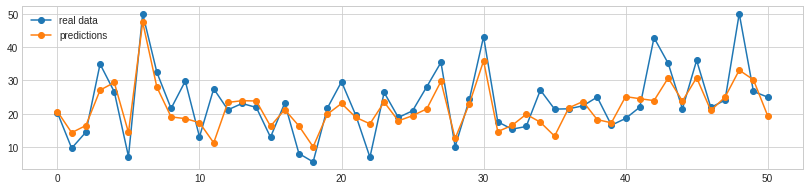

In [60]:
y_test4_predictions = model.predict(x_test4.reshape(-1, 13, 1))
plt.figure(figsize=(14,3))
plt.plot(range(len(y_test4)), y_test4, '-o', label = 'real data')
plt.plot(range(len(y_test4)), y_test4_predictions, '-o', label = 'predictions')
plt.legend();

<h1 style="color:#ff603b; font-family:Ewert; font-size:300%;" class="font-effect-3d">Recurrent Neural Networks</h1>

In [61]:
# RNN: Multi-Class Classification
def model():
    model = Sequential()
    model.add(LSTM(112, return_sequences=True, input_shape=(1,784)))    
    model.add(LSTM(112, return_sequences=True)) 
    model.add(LSTM(112))      
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])    
    return model 

In [62]:
model = model()
checkpointer = ks.callbacks.ModelCheckpoint(filepath='weights.best.model.hdf5',  save_best_only=True)
lr_reduction = ks.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=2, factor=0.5)

history = model.fit(x_train2.reshape(-1, 1,784), c_y_train2, 
                    validation_data=(x_valid2.reshape(-1, 1, 784), c_y_valid2),
                    epochs=10, batch_size=128, verbose=0,
                    callbacks=[checkpointer,  lr_reduction])

model.load_weights('weights.best.model.hdf5')
model.evaluate(x_test2.reshape(-1, 1,784), c_y_test2)

5000/5000 [==============================] - 1s 122us/step


[0.2011969897687435, 0.9372]

In [63]:
# RNN: Regression
def model():
    model = Sequential()    
    model.add(LSTM(52, return_sequences=True, input_shape=(1, 13)))
    model.add(LSTM(208, return_sequences=False))       
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])  
    return model 

In [64]:
model = model()
checkpointer = ks.callbacks.ModelCheckpoint(filepath='weights.best.model.hdf5', verbose=0, save_best_only=True)
lr_reduction = ks.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=10, verbose=2, factor=0.95)

history = model.fit(x_train4.reshape(-1, 1, 13),  y_train4, 
                    validation_data=(x_valid4.reshape(-1, 1, 13),  y_valid4),
                    epochs=400, batch_size=16, verbose=0,
                    callbacks=[checkpointer,  lr_reduction])

model.load_weights('weights.best.model.hdf5')
model.evaluate(x_test4.reshape(-1, 1, 13),  y_test4)


Epoch 00075: ReduceLROnPlateau reducing learning rate to 0.0009500000451225787.

Epoch 00085: ReduceLROnPlateau reducing learning rate to 0.0009025000152178108.

Epoch 00099: ReduceLROnPlateau reducing learning rate to 0.0008573750033974647.

Epoch 00109: ReduceLROnPlateau reducing learning rate to 0.0008145062311086804.

Epoch 00119: ReduceLROnPlateau reducing learning rate to 0.0007737808919046074.

Epoch 00129: ReduceLROnPlateau reducing learning rate to 0.000735091819660738.

Epoch 00145: ReduceLROnPlateau reducing learning rate to 0.0006983372120885178.

Epoch 00165: ReduceLROnPlateau reducing learning rate to 0.0006634203542489559.

Epoch 00175: ReduceLROnPlateau reducing learning rate to 0.0006302493420662358.

Epoch 00185: ReduceLROnPlateau reducing learning rate to 0.0005987368611386045.

Epoch 00195: ReduceLROnPlateau reducing learning rate to 0.0005688000208465382.

Epoch 00219: ReduceLROnPlateau reducing learning rate to 0.0005403600225690752.

Epoch 00229: ReduceLROnPlate

[48.112275217093675, 4.682231482337503]

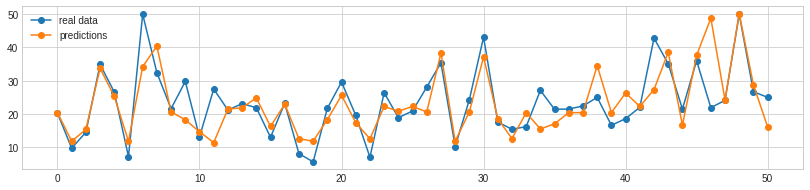

In [65]:
y_test4_predictions = model.predict(x_test4.reshape(-1, 1, 13))
plt.figure(figsize=(14,3))
plt.plot(range(len(y_test4)), y_test4, '-o', label = 'real data')
plt.plot(range(len(y_test4)), y_test4_predictions, '-o', label = 'predictions')
plt.legend();

<h1 style="color:#ff603b; font-family:Ewert; font-size:300%;" class="font-effect-3d">Applications</h1>

In [66]:
# ResNet50
fn = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5'
resnet50_model = ks.applications.resnet50.ResNet50(weights=fn)

In [67]:
fn2 = '../input/image-examples-for-mixed-styles/cat.png'
fn3 = '../input/resnet50/imagenet_class_index.json'
cat_image = keras_image.load_img(fn2, target_size=(224, 224))
CLASS_INDEX = None

def decode_predictions(preds, fpath, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 1000)). '
                         'Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        results.append(result)
    return results

Predictions:
 [('n02120505', 'grey_fox', 0.20489316), ('n02120079', 'Arctic_fox', 0.17673324), ('n02123394', 'Persian_cat', 0.15682295), ('n02119022', 'red_fox', 0.056277525), ('n02123045', 'tabby', 0.05580891)]


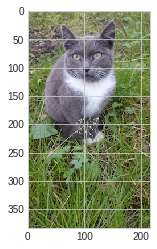

In [68]:
x = keras_image.img_to_array(cat_image)
x = np.expand_dims(x, axis=0)
x = ks.applications.resnet50.preprocess_input(x)

cat_predictions = resnet50_model.predict(x)
print('Predictions:\n', decode_predictions(cat_predictions, fn3)[0])

cv_cat_image = cv2.imread(fn2)
rgb_cat_image = cv2.cvtColor(cv_cat_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_cat_image);

In [69]:
# InceptionV3
fn = '../input/keras-applications-weights/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
iv3_base_model = ks.applications.InceptionV3(weights=fn, include_top=False)

x = iv3_base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)

y = Dense(10, activation='softmax')(x)

iv3_model = Model(inputs=iv3_base_model.input, outputs=y)

In [70]:
# Freeze InceptionV3 convolutional layers
for layer in iv3_base_model.layers:
    layer.trainable = False
    
iv3_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])    

In [71]:
# Train
steps, epochs = 189, 10
data_generator = keras_image.ImageDataGenerator(shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
checkpointer = ks.callbacks.ModelCheckpoint(filepath='weights.best.iv3_model.hdf5', verbose=2, save_best_only=True)
lr_reduction = ks.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=2, factor=0.5)

history = iv3_model.fit_generator(data_generator.flow(x_train7, c_y_train7, batch_size=64), 
                                  steps_per_epoch = steps, epochs = epochs, 
                                  callbacks=[checkpointer, lr_reduction],
                                  validation_data = (x_valid7, c_y_valid7))

Epoch 1/10
189/189 [==============================] - 43s 229ms/step - loss: 0.4581 - acc: 0.8733 - val_loss: 6.2672 - val_acc: 0.4000

Epoch 00001: val_loss improved from inf to 6.26719, saving model to weights.best.iv3_model.hdf5
Epoch 2/10
189/189 [==============================] - 36s 192ms/step - loss: 0.1346 - acc: 0.9627 - val_loss: 5.6426 - val_acc: 0.3000

Epoch 00002: val_loss improved from 6.26719 to 5.64257, saving model to weights.best.iv3_model.hdf5
Epoch 3/10
189/189 [==============================] - 37s 194ms/step - loss: 0.0964 - acc: 0.9716 - val_loss: 6.8722 - val_acc: 0.3000

Epoch 00003: val_loss did not improve from 5.64257
Epoch 4/10
189/189 [==============================] - 37s 197ms/step - loss: 0.0752 - acc: 0.9770 - val_loss: 5.3999 - val_acc: 0.4000

Epoch 00004: val_loss improved from 5.64257 to 5.39990, saving model to weights.best.iv3_model.hdf5
Epoch 5/10
189/189 [==============================] - 38s 201ms/step - loss: 0.0796 - acc: 0.9772 - val_loss:

In [72]:
# Unfreeze InceptionV3 convolutional layers
for layer in iv3_model.layers[:173]:
    layer.trainable = False
for layer in iv3_model.layers[173:]:
    layer.trainable = True
    
iv3_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  

In [73]:
# Train
history = iv3_model.fit_generator(data_generator.flow(x_train7, c_y_train7, batch_size=64), 
                                  steps_per_epoch = steps, epochs = epochs, 
                                  callbacks=[checkpointer, lr_reduction],
                                  validation_data = (x_valid7, c_y_valid7))

Epoch 1/10
189/189 [==============================] - 51s 272ms/step - loss: 0.1260 - acc: 0.9839 - val_loss: 10.8317 - val_acc: 0.1000

Epoch 00001: val_loss did not improve from 4.20455
Epoch 2/10
189/189 [==============================] - 39s 206ms/step - loss: 0.0541 - acc: 0.9961 - val_loss: 1.6765 - val_acc: 0.6000

Epoch 00002: val_loss improved from 4.20455 to 1.67650, saving model to weights.best.iv3_model.hdf5
Epoch 3/10
189/189 [==============================] - 38s 203ms/step - loss: 0.0032 - acc: 0.9991 - val_loss: 1.6473 - val_acc: 0.7000

Epoch 00003: val_loss improved from 1.67650 to 1.64730, saving model to weights.best.iv3_model.hdf5
Epoch 4/10
189/189 [==============================] - 43s 227ms/step - loss: 0.0113 - acc: 0.9976 - val_loss: 0.8147 - val_acc: 0.9000

Epoch 00004: val_loss improved from 1.64730 to 0.81471, saving model to weights.best.iv3_model.hdf5
Epoch 5/10
189/189 [==============================] - 40s 211ms/step - loss: 0.0051 - acc: 0.9987 - val_

In [74]:
# Evaluate 
iv3_model.load_weights('weights.best.iv3_model.hdf5')
iv3_test_scores = iv3_model.evaluate(x_test7, c_y_test7)
print("Accuracy: %.2f%%" % (iv3_test_scores[1]*100))

11/11 [==============================] - 0s 14ms/step
Accuracy: 90.91%
